In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp

In [2]:
DATA_PATH = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"

df = pd.read_csv(DATA_PATH)

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data Structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df['ocean_proximity'] = df['ocean_proximity'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


# Train/Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
income_category = pd.cut(df['median_income'],
                         bins=[0, 1.5, 3, 4.5, 6, np.inf],
                         labels=[1, 2, 3, 4, 5])

In [10]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42,
                                     shuffle=True,
                                     stratify=income_category
                                     )

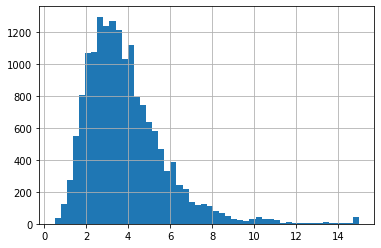

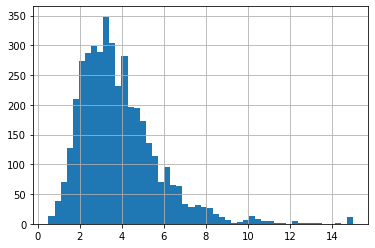

In [11]:
df_train['median_income'].hist(bins=50)
plt.show()
df_test['median_income'].hist(bins=50)
plt.show()

# Save Datasets

In [12]:
import os

BASE_DIR = os.getcwd()
TEST_DIR = "test_folder"
TRAIN_DIR = "train_folder"

SAVE_TEST_DIR = os.path.join(BASE_DIR, TEST_DIR)
SAVE_TRAIN_DIR = os.path.join(BASE_DIR, TRAIN_DIR)

os.mkdir(SAVE_TEST_DIR)
os.mkdir(SAVE_TRAIN_DIR)

TEST_FILE = os.path.join(SAVE_TEST_DIR, "test.pkl")
TRAIN_FILE = os.path.join(SAVE_TRAIN_DIR, "train.pkl")

df_test.to_pickle(TEST_FILE)
df_train.to_pickle(TRAIN_FILE)

<hr>

In [13]:
import os

BASE_DIR = os.getcwd()
TEST_DIR = "test_folder"
TRAIN_DIR = "train_folder"

SAVE_TEST_DIR = os.path.join(BASE_DIR, TEST_DIR)
SAVE_TRAIN_DIR = os.path.join(BASE_DIR, TRAIN_DIR)

TEST_FILE = os.path.join(SAVE_TEST_DIR, "test.pkl")
TRAIN_FILE = os.path.join(SAVE_TRAIN_DIR, "train.pkl")

In [14]:
df_train = pd.read_pickle(TRAIN_FILE)
df_train.shape

(16512, 10)

# Feature Engineering

In [15]:
X_train = df_train.drop(['median_house_value'], axis=1)
y_train = df_train['median_house_value']

In [16]:
y_train

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

# Data Cleaning

In [17]:
H = X_train.copy()

In [18]:
H[H.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,NaN,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,NEAR OCEAN


In [19]:
# Drop NaN by rows
H.dropna(subset=['total_bedrooms'])
# H = H.dropna(subset=['total_bedrooms'])
# H.dropna(subset=['total_bedrooms'], inplace=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [20]:
# Drop NaN by columns
H.drop(['total_bedrooms'], axis=1)
# H = H.drop(['total_bedrooms'], axis=1)
# H.drop(['total_bedrooms'], axis=1, inplace=True)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,1208.0,501.0,4.1964,<1H OCEAN


In [21]:
idx = H.isnull().any().index
idx[H.isnull().any()]

Index(['total_bedrooms'], dtype='object')

In [22]:
# Fill NaN by median, mean, max, min itd.

In [23]:
m = H['total_bedrooms'].median()
m

433.0

In [24]:
H['total_bedrooms'].fillna(m, inplace=True)
# H['total_bedrooms'] = H['total_bedrooms'].fillna(m)

In [25]:
H.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16512 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  category
dtypes: category(1), float64(8)
memory usage: 1.1 MB


In [26]:
H_clean = pd.get_dummies(H)

## scikit-learn

In [27]:
Q = X_train.copy()

In [28]:
Q_num = Q.select_dtypes(include='number')
Q_cat = Q.select_dtypes(exclude='number')

### Missing Values

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
imputer = SimpleImputer(strategy="median")
imputer.fit(Q_num)
Q_num_tr = imputer.transform(Q_num)  # Q_num_tr = impouter.fit_transform(Q_num)

In [31]:
Q_num_tr_df = pd.DataFrame(data=Q_num_tr,
                           columns=Q_num.columns,
                           index=Q_num.index)

Q_num_tr_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


### StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Q_num_tr_df)
Q_num_tr_sc = scaler.transform(Q_num_tr_df)
Q_num_tr_sc

Q_num_tr_sc_df = pd.DataFrame(data=Q_num_tr_sc,
                           columns=Q_num_tr_df.columns,
                           index=Q_num_tr_df.index)
Q_num_tr_sc_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752
...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261


### Categorical Variables

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
cat_encoder = OneHotEncoder(sparse=False)
cat_encoder.fit(Q_cat)
Q_cat_tr = cat_encoder.transform(Q_cat)

In [35]:
cat_col = [f"ocean_proximity_{x}" for x in cat_encoder.categories_[0]]
cat_col

['ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [36]:
Q_cat_tr_df = pd.DataFrame(Q_cat_tr,
                           columns=cat_col,
                           index=Q_cat.index)
Q_cat_tr_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,0.0,1.0,0.0,0.0,0.0
15502,0.0,0.0,0.0,0.0,1.0
2908,0.0,1.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,1.0
20496,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
15174,1.0,0.0,0.0,0.0,0.0
12661,0.0,1.0,0.0,0.0,0.0
19263,1.0,0.0,0.0,0.0,0.0
19140,1.0,0.0,0.0,0.0,0.0


#### Full data

In [37]:
Q_clean = pd.concat([Q_num_tr_sc_df, Q_cat_tr_df], axis=1)
Q_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,0.0,1.0,0.0,0.0,0.0
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,0.0,0.0,0.0,0.0,1.0
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,1.0,0.0,0.0,0.0,0.0
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.0,1.0,0.0,0.0,0.0
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,1.0,0.0,0.0,0.0,0.0
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,1.0,0.0,0.0,0.0,0.0


### Regression

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Q_clean, y_train)

LinearRegression()

In [39]:
lr.score(Q_clean, y_train)

0.6438078994746375

### Check on test train

In [40]:
X_test = pd.read_pickle("./test_folder/test.pkl")
y_test = X_test.pop('median_house_value')

In [41]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,<1H OCEAN
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,<1H OCEAN
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,<1H OCEAN
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,<1H OCEAN


... :(

# Pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [43]:
num_attr = X_train.select_dtypes(include='number').columns
cat_attr = X_train.select_dtypes(exclude='number').columns

In [44]:
num_pipeline = Pipeline(
    [
     ('imputer', SimpleImputer(strategy='median')),
     ('standard_scaller', StandardScaler()),
    ]
)

cat_num_pipeline = ColumnTransformer(
    transformers=
    [
     ('numerical', num_pipeline, num_attr),
     ('categorical', OneHotEncoder(), cat_attr)
    ]
)

linear_pipeline = Pipeline(steps=[
    ('tr_pipeline', cat_num_pipeline),
    ('linear_regression',  LinearRegression())
])

In [45]:
X_train_tr = linear_pipeline.fit(X_train, y_train)

In [46]:
from sklearn.metrics import r2_score

r2_score(y_test, linear_pipeline.predict(X_test))

0.6519949368926146

In [47]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train, linear_pipeline.predict(X_train), squared=False))
print(mean_squared_error(y_test, linear_pipeline.predict(X_test), squared=False))

69050.56219504567
67346.87995764882


In [48]:
pd.DataFrame(linear_pipeline['tr_pipeline'].transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,1.0,0.0,0.0,0.0,0.0
16508,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.0,1.0,0.0,0.0,0.0
16509,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,1.0,0.0,0.0,0.0,0.0
16510,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,1.0,0.0,0.0,0.0,0.0


<hr>

### Decision Tree Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
num_pipeline = Pipeline(
    [
     ('imputer', SimpleImputer(strategy='median')),
     ('standard_scaller', StandardScaler()),
    ]
)

cat_num_pipeline = ColumnTransformer(
    transformers=
    [
     ('numerical', num_pipeline, num_attr),
     ('categorical', OneHotEncoder(), cat_attr)
    ]
)

tree_pipeline = Pipeline(steps=[
    ('tr_pipeline', cat_num_pipeline),
    ('linear_regression',  DecisionTreeRegressor(random_state=42))
])

In [51]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tr_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard_scaller',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('linear_regression', DecisionTreeRegressor(random_state=42))])

In [52]:
print(mean_squared_error(y_train, tree_pipeline.predict(X_train), squared=False))
print(mean_squared_error(y_test, tree_pipeline.predict(X_test), squared=False))

0.0
69203.52536476958


### Better Evaluation Using Cross-Validation

In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_pipeline, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

print(tree_rmse_scores)
print(f"Mean: {tree_rmse_scores.mean()}")
print(f"Std: {tree_rmse_scores.std()}")

[71152.59187256 70068.70314956 64901.96987894 68783.02168675
 66944.32525877 68260.00359756 71031.16291424 69086.59778928
 67252.39727946 73247.28194339]
Mean: 69072.80553705241
Std: 2292.678273223765


In [54]:
scores = cross_val_score(linear_pipeline, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
linear_rmse_scores = np.sqrt(-scores)

print(linear_rmse_scores)
print(f"Mean: {linear_rmse_scores.mean()}")
print(f"Std: {linear_rmse_scores.std()}")

[72229.41585732 65317.99234531 67706.39604745 69368.37518568
 66767.04362643 73003.75273869 70522.24414582 69440.77896541
 66930.32945876 70756.88085072]
Mean: 69204.32092215857
Std: 2372.2512132439283


# Model Fine-tuning

In [55]:
X_train_tr = cat_num_pipeline.fit_transform(X_train)
X_test_tr = cat_num_pipeline.transform(X_test)

### Tree

In [56]:
tr = DecisionTreeRegressor(random_state=42, max_depth=3, min_samples_split=7)
tr.fit(X_train_tr, y_train)

y_train_pred = tr.predict(X_train_tr)
y_test_pred = tr.predict(X_test_tr)


print(f"MSE train: {mean_squared_error(y_train, y_train_pred, squared=False)}")
print(f"MSE test:  {mean_squared_error(y_test, y_test_pred, squared=False)}")

MSE train: 76118.50508259152
MSE test:  74411.14381057909


In [57]:
tr = DecisionTreeRegressor(random_state=42, min_samples_split=7)
tr.fit(X_train_tr, y_train)

y_train_pred = tr.predict(X_train_tr)
y_test_pred = tr.predict(X_test_tr)


print(f"MSE train: {mean_squared_error(y_train, y_train_pred, squared=False)}")
print(f"MSE test:  {mean_squared_error(y_test, y_test_pred, squared=False)}")

MSE train: 21272.92183357023
MSE test:  66046.85072309691


In [58]:
tr = DecisionTreeRegressor(random_state=42, max_depth=5)
tr.fit(X_train_tr, y_train)

y_train_pred = tr.predict(X_train_tr)
y_test_pred = tr.predict(X_test_tr)


print(f"MSE train: {mean_squared_error(y_train, y_train_pred, squared=False)}")
print(f"MSE test:  {mean_squared_error(y_test, y_test_pred, squared=False)}")

MSE train: 69518.21444703668
MSE test:  70456.06294373612


In [59]:
from sklearn.model_selection import GridSearchCV

param = {
    'max_depth': [3, 4, 10, 15], 
    'min_samples_split': [2, 4, 6, 8]
}


tree_gs_reg = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(tree_gs_reg, 
                           param,
                           scoring='neg_root_mean_squared_error',
                          verbose=1)

grid_search.fit(X_train_tr, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 4, 10, 15],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [60]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 8}

In [61]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

76657.64909206053 {'max_depth': 3, 'min_samples_split': 2}
76657.64909206053 {'max_depth': 3, 'min_samples_split': 4}
76657.64909206053 {'max_depth': 3, 'min_samples_split': 6}
76657.64909206053 {'max_depth': 3, 'min_samples_split': 8}
73374.0475884929 {'max_depth': 4, 'min_samples_split': 2}
73374.0475884929 {'max_depth': 4, 'min_samples_split': 4}
73374.0475884929 {'max_depth': 4, 'min_samples_split': 6}
73374.0475884929 {'max_depth': 4, 'min_samples_split': 8}
62221.43308841666 {'max_depth': 10, 'min_samples_split': 2}
62358.74089260424 {'max_depth': 10, 'min_samples_split': 4}
62182.03546361779 {'max_depth': 10, 'min_samples_split': 6}
61764.75307312196 {'max_depth': 10, 'min_samples_split': 8}
67677.07894529494 {'max_depth': 15, 'min_samples_split': 2}
66561.97890002326 {'max_depth': 15, 'min_samples_split': 4}
65233.21512835184 {'max_depth': 15, 'min_samples_split': 6}
64315.50413950429 {'max_depth': 15, 'min_samples_split': 8}


In [62]:
best_tree = grid_search.best_estimator_

### Random Forrest

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=3,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True,
                          verbose=3)

grid_search.fit(X_train_tr, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END max_features=2, n_estimators=3;, score=(train=-33742.753, test=-63744.470) total time=   0.0s
[CV 2/3] END max_features=2, n_estimators=3;, score=(train=-33658.374, test=-65782.943) total time=   0.0s
[CV 3/3] END max_features=2, n_estimators=3;, score=(train=-33411.470, test=-64951.290) total time=   0.0s
[CV 1/3] END max_features=2, n_estimators=10;, score=(train=-24252.766, test=-54325.128) total time=   0.1s
[CV 2/3] END max_features=2, n_estimators=10;, score=(train=-24983.011, test=-56817.333) total time=   0.1s
[CV 3/3] END max_features=2, n_estimators=10;, score=(train=-24271.477, test=-55953.185) total time=   0.1s
[CV 1/3] END max_features=2, n_estimators=30;, score=(train=-21234.917, test=-52188.925) total time=   0.4s
[CV 2/3] END max_features=2, n_estimators=30;, score=(train=-21141.479, test=-53704.262) total time=   0.4s
[CV 3/3] END max_features=2, n_estimators=30;, score=(train=-20923.032, test=-

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [64]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

64826.23436104149 {'max_features': 2, 'n_estimators': 3}
55698.54864043675 {'max_features': 2, 'n_estimators': 10}
53190.59314575786 {'max_features': 2, 'n_estimators': 30}
61511.754627028284 {'max_features': 4, 'n_estimators': 3}
53625.998970985565 {'max_features': 4, 'n_estimators': 10}
51053.511956455164 {'max_features': 4, 'n_estimators': 30}
58657.800721222586 {'max_features': 6, 'n_estimators': 3}
52527.04356807493 {'max_features': 6, 'n_estimators': 10}
50363.53082358346 {'max_features': 6, 'n_estimators': 30}
59617.21397624324 {'max_features': 8, 'n_estimators': 3}
52669.72601150704 {'max_features': 8, 'n_estimators': 10}
50540.98720462173 {'max_features': 8, 'n_estimators': 30}
63590.39362936667 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54513.48876730835 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61665.15862102074 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54205.2858648715 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [65]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [66]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)